<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-practice/blob/main/dropout_regression_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate Data

In [42]:
x_train = np.linspace(-1 , 1 , 20)

In [43]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [45]:
X_test = np.linspace(-1, 1, 20)

In [46]:
x_test

array([-0.97768869, -0.87754128, -0.9374229 ,  0.34078669, -0.35050577,
        0.20550985,  0.56732535, -0.75777153,  0.49129293,  0.91952227,
        0.99928243,  0.54981045,  0.20619015, -0.83990319, -0.75918134,
        0.70411235,  0.84730077,  0.71783479,  0.39395044,  0.94286412])

In [47]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

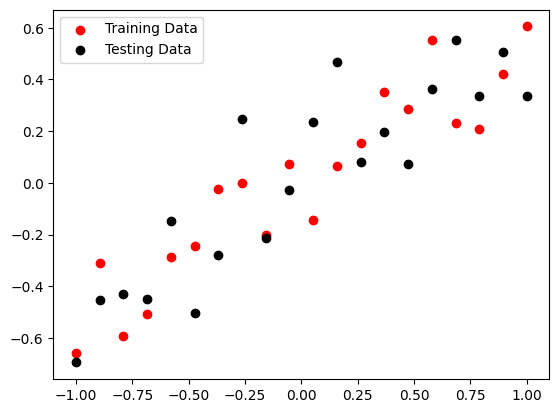

In [48]:
plt.scatter(x_train , y_train , color = 'red' , label='Training Data')
plt.scatter(x_train , y_test , color = 'black' , label='Testing Data')
plt.legend()
plt.show()

# Regression Model

In [93]:
model = Sequential()

model.add(Dense(128 ,input_dim = 1 , activation = 'relu' ) )
model.add(Dense(128 , activation='relu'))

model.add(Dense(1, activation='linear'))

adam = Adam(learning_rate=0.01)
model.compile(loss='mse' , optimizer=adam , metrics=['mse'])
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), verbose=False)


# evaluate the model

In [94]:
_, train_mse = model.evaluate(x_train, y_train, verbose=0)
_, test_mse = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.011, Test: 0.170


In [95]:
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


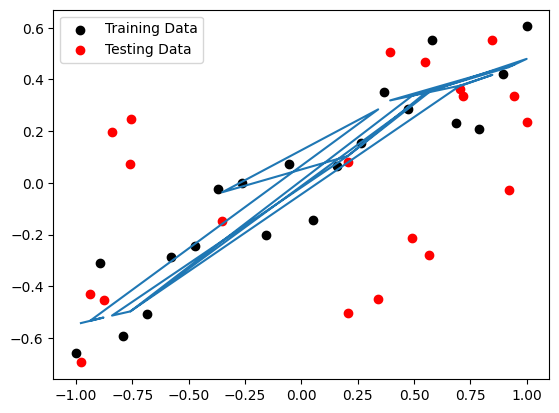

In [96]:
plt.figure()
plt.scatter(x_train, y_train, color='black', label='Training Data')
plt.scatter(x_test, y_test, color= 'red', label='Testing Data')
plt.plot(x_test, y_pred)
plt.legend()
plt.show()

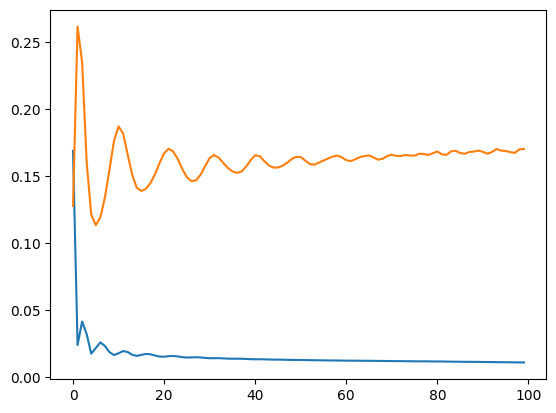

In [97]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Dropout Model

In [102]:
model = Sequential()

model.add(Dense(128 ,input_dim = 1 , activation = 'relu' ))
model.add(Dropout(0.5))
model.add(Dense(128 , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

adam = Adam(learning_rate=0.01)

model.compile(loss='mse' , optimizer=adam , metrics=['mse'])

history = model.fit(x_train, y_train, epochs=125, validation_data=(x_test, y_test), verbose=False)


# evaluate the model

In [103]:
_, train_mse = model.evaluate(x_train, y_train, verbose=0)
_, test_mse = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.016, Test: 0.164


In [104]:
y_pred =model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


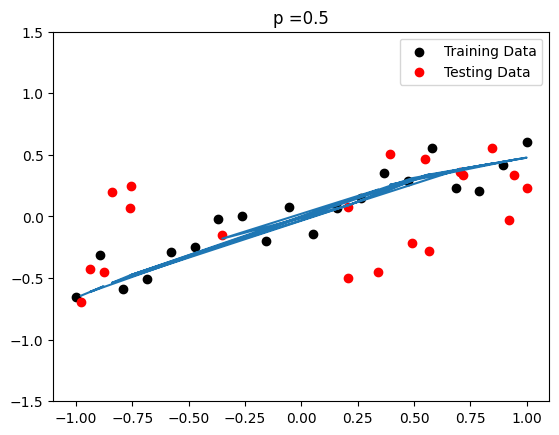

In [105]:
plt.figure()
plt.title('p =0.5')
plt.scatter(x_train, y_train, color='black', label='Training Data')
plt.scatter(x_test, y_test, color= 'red', label='Testing Data')
plt.plot(x_test, y_pred)
plt.legend()
plt.ylim(-1.5, 1.5)
plt.show()

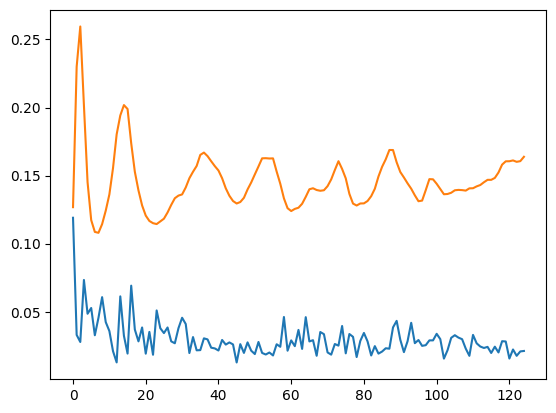

In [106]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])